In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/14986.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/3138.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/1700.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/16257.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/2863.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/771.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12167.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/17643.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/6560.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/10162.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/4009.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/15823.jpg
/kaggle/input/intel-image-classification/seg_tr

****WORKING ON CNN MODEL****

In [40]:
#importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
data_dir = '/kaggle/input/intel-image-classification'

# Define the ImageDataGenerator for training
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)



In [44]:
import os

# Defining the correct path to the dataset
data_dir = '/kaggle/input/intel-image-classification'

# Initializing a counter
count = 0
max_count = 10

# Listing the directories and files in the dataset
for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f'Directory: {dirpath}')
    for dirname in dirnames:
        print(f'  Sub-directory: {dirname}')
        count += 1
        if count >= max_count:
            break
    for filename in filenames:
        print(f'  File: {filename}')
        count += 1
        if count >= max_count:
            break
    if count >= max_count:
        break
    print()  # Adding a blank line


Directory: /kaggle/input/intel-image-classification
  Sub-directory: seg_train
  Sub-directory: seg_pred
  Sub-directory: seg_test

Directory: /kaggle/input/intel-image-classification/seg_train
  Sub-directory: seg_train

Directory: /kaggle/input/intel-image-classification/seg_train/seg_train
  Sub-directory: mountain
  Sub-directory: street
  Sub-directory: buildings
  Sub-directory: sea
  Sub-directory: forest
  Sub-directory: glacier


****Training the model****

In [75]:
# Loading training data set
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/intel-image-classification/seg_train/seg_train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 11230 images belonging to 6 classes.


In [76]:
# Loading validation data
validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/intel-image-classification/seg_train/seg_train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2804 images belonging to 6 classes.


**Defining Cnn structure**

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Defining the CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),  # Define the input shape using the Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes on dataset
])


model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
from tensorflow.keras.optimizers import Adam
# List of loss functions to evaluate
loss_functions = ['categorical_crossentropy']  # Only using classification-appropriate loss functions
results = {}

for loss_function in loss_functions:
    print(f'\nEvaluating model with {loss_function} loss function')
    
    # Compile the model
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    


Evaluating model with categorical_crossentropy loss function


**Training the Model**

In [85]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10 
)

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 298s 850ms/step - accuracy: 0.5456 - loss: 1.1312 - val_accuracy: 0.7310 - val_loss: 0.7579
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7812 - loss: 0.7303 - val_accuracy: 0.6500 - val_loss: 0.9888
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 300s 856ms/step - accuracy: 0.7202 - loss: 0.7371 - val_accuracy: 0.7550 - val_loss: 0.6430
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7812 - loss: 0.6306 - val_accuracy: 0.8000 - val_loss: 0.8475
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 298s 850ms/step - accuracy: 0.7917 - loss: 0.5640 - val_accuracy: 0.7949 - val_loss: 0.5716
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - accuracy: 0.9062 - loss: 0.3711 - val_accuracy: 0.7000 - val_loss: 0.7276
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 297s 848ms/step - accuracy: 0.8356 - loss: 0.4594 - val_accuracy: 0.7820 - val_loss: 0.6058
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.7500 - loss: 0.585

In [88]:
# Evaluating the model based on training and validation
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_acc}')

88/88 ━━━━━━━━━━━━━━━━━━━━ 18s 205ms/step - accuracy: 0.8070 - loss: 0.6224
Validation loss: 0.5707150101661682
Validation accuracy: 0.8181169629096985


**Testing the model**

In [89]:
# Defining the ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data from the specific test folder
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/intel-image-classification/seg_test/seg_test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure that data is not shuffled to keep order
)


Found 3000 images belonging to 6 classes.


In [90]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')


93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.8134 - loss: 0.6110
Test loss: 0.567373514175415
Test accuracy: 0.8202285170555115


**Plot training, validation, and test accuracy values**

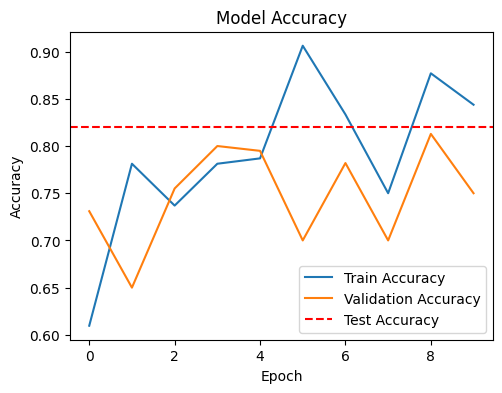

In [91]:
# Plot training, validation, and test accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

**Plotting training and testing accuracy values**

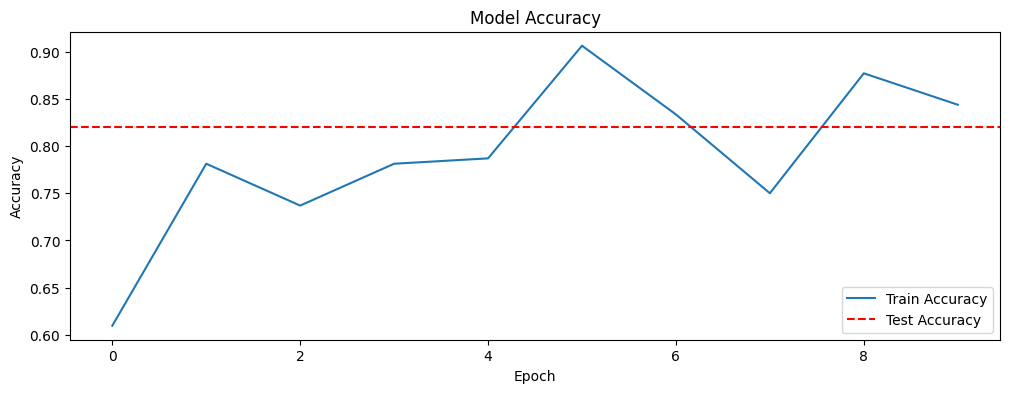

In [92]:
# Plot training and testing accuracy values
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

**Working with Predictt=ion Class**

In [103]:
# Defining the ImageDataGenerator for prediction data
pred_datagen = ImageDataGenerator(rescale=1./255)

# Load prediction data from the specific prediction folder
pred_generator = pred_datagen.flow_from_directory(
    '/kaggle/input/intel-image-classification/seg_pred',
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,  # No labels for prediction data
    shuffle=False  # Ensure that data is not shuffled to keep order
)

Found 7301 images belonging to 1 classes.


In [104]:
# Make predictions on the prediction data
predictions = model.predict(pred_generator, steps=pred_generator.samples // pred_generator.batch_size)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

print(f'Predicted classes: {predicted_classes}')

228/228 ━━━━━━━━━━━━━━━━━━━━ 47s 207ms/step
Predicted classes: [0 3 0 ... 5 4 5]


**Splitting and flattening the prediction class as it is being treated as a single class inside seg_pred**

In [113]:
#splitting and flattening the prediction class as it is being treated as a single class
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_images_from_directory(directory, target_size=(150, 150)):
    from pathlib import Path
    image_files = list(Path(directory).glob('*.jpg'))  # Adjust pattern as needed
    images = []
    for img_path in image_files:
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

# Load images
images = load_images_from_directory('/kaggle/input/intel-image-classification/seg_pred/seg_pred')

# Check if images array is not empty
if images.size == 0:
    raise ValueError("No images loaded. Please check the directory and file patterns.")

# Rescale images
images = images / 255.0

# Ensure images have a batch dimension if necessary
if len(images.shape) == 3:  # Single image case
    images = np.expand_dims(images, axis=0)

# Predict in batches
batch_size = 32  
predictions = []
for start in range(0, len(images), batch_size):
    end = min(start + batch_size, len(images))
    batch = images[start:end]
    batch_predictions = model.predict(batch, verbose=1)
    predictions.append(batch_predictions)

# Flatten the predictions list
predictions = np.concatenate(predictions, axis=0)

print("Predictions shape:", predictions.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

**Making a confusion Matrix**

88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step


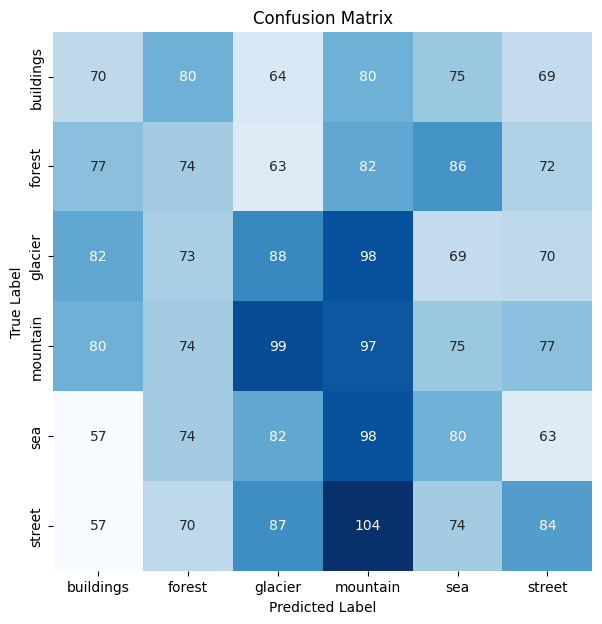

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd


true_labels = validation_generator.classes 
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Computing confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Converting confusion matrix to DataFrame for better plotting
class_names = list(validation_generator.class_indices.keys())
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Calculating F1 score, recall and accuracy**

In [124]:
from sklearn.metrics import classification_report
import numpy as np

# Fetch a batch of images and labels from the validation generator
images, true_labels = next(validation_generator)

# Convert true_labels from one-hot encoding to class indices
true_labels = np.argmax(true_labels, axis=1)

# Predict the classes of these images
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(true_labels, predicted_classes, target_names=list(validation_generator.class_indices.keys()))

print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
              precision    recall  f1-score   support

   buildings       0.89      1.00      0.94         8
      forest       1.00      1.00      1.00         5
     glacier       0.50      0.50      0.50         4
    mountain       0.75      0.43      0.55         7
         sea       0.57      1.00      0.73         4
      street       1.00      0.75      0.86         4

    accuracy                           0.78        32
   macro avg       0.79      0.78      0.76        32
weighted avg       0.80      0.78      0.77        32



**MAKING ROC AUC CURVE**

In [127]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle

# Binarize the true labels
true_labels_binarized = label_binarize(true_labels, classes=list(validation_generator.class_indices.keys()))

# Compute ROC curve and AUC for each class
n_classes = len(validation_generator.class_indices)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels_binarized.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ran

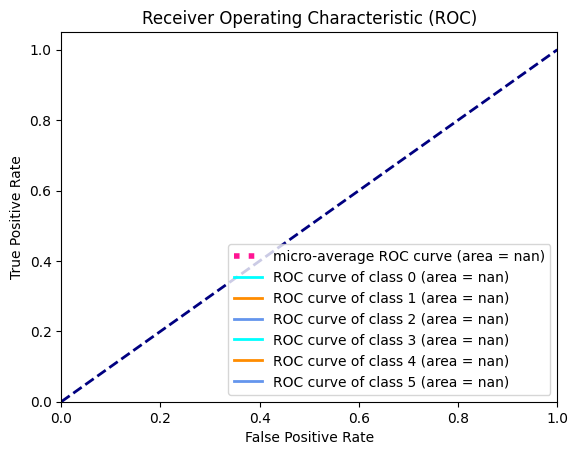

In [128]:
# Plotting ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = %0.2f)' % roc_auc["micro"], color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


**CALIBRATING THE MODEL**

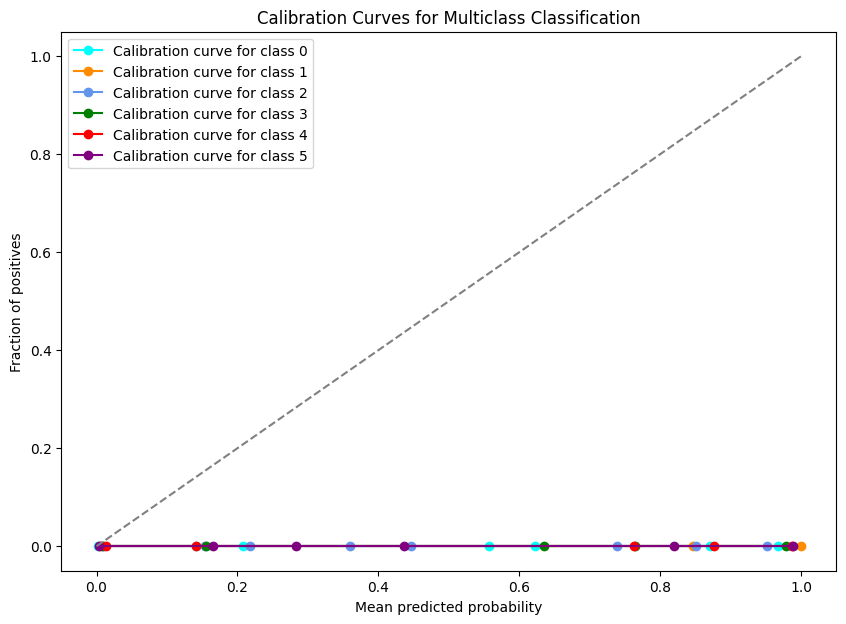

In [130]:
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the true labels
true_labels_binarized = label_binarize(true_labels, classes=list(validation_generator.class_indices.keys()))

# Compute and plot calibration curve for each class
plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])  # Adjust colors as needed

for i, color in zip(range(len(validation_generator.class_indices)), colors):
    prob_true, prob_pred = calibration_curve(true_labels_binarized[:, i], predictions[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', color=color, label=f'Calibration curve for class {i}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves for Multiclass Classification')
plt.legend(loc='best')
plt.show()


**Saving the model**

In [133]:
# Save the model 
model.save('/kaggle/working/model.h5')

print("Save successful")

Save successful
